In [1]:
import pandas as pd 
import glob
import os

In [2]:
folder_path = '../data/'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

df_list = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(df_list, ignore_index=True)

#calculate revenue per row
combined_df["Revenue"] = combined_df["Quantity_Sold"] * combined_df["Unit_Price"]

print(combined_df.head())

         Date     Product  Quantity_Sold  Unit_Price  Revenue
0  2024-01-01      Laptop              5        1000     5000
1  2024-01-01       Phone             10         500     5000
2  2024-01-01  Headphones              3         150      450
3  2024-01-02      Laptop              7         950     6650
4  2024-01-02       Phone              8         520     4160


In [4]:
combined_df.to_csv('combined_sales_data.csv', index=False)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

C:\Users\ahmed\AppData\Local\Temp\ipykernel_7180\2932748352.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='Blues_d')


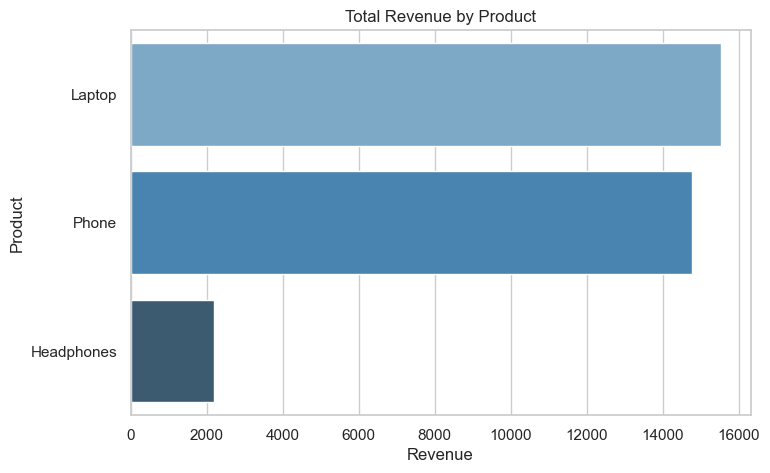

In [6]:
product_revenue = combined_df.groupby("Product")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='Blues_d')
plt.title("Total Revenue by Product")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.tight_layout
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

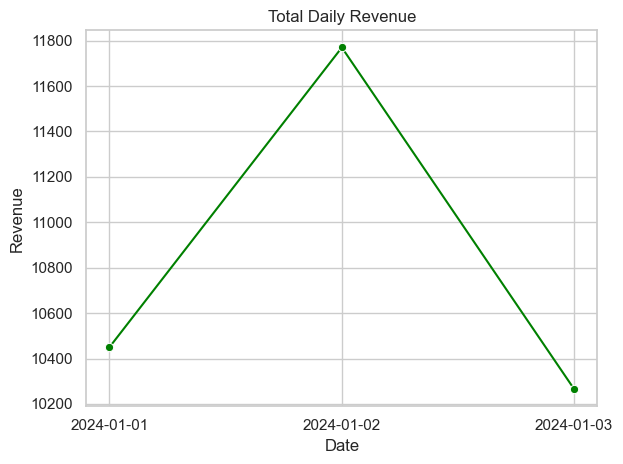

In [11]:
daily_revenue = combined_df.groupby("Date")["Revenue"].sum()

plt.Figure(figsize=(8, 5))
sns.lineplot(x=daily_revenue.index, y=daily_revenue.values, marker="o", color='green')
plt.title("Total Daily Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show

C:\Users\ahmed\AppData\Local\Temp\ipykernel_7180\2533141691.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_quantity.values, y=product_quantity.index, palette='Oranges_r')


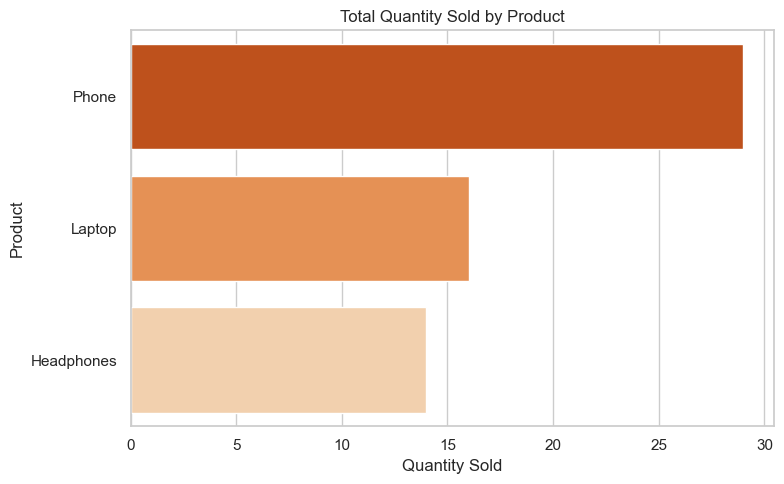

In [9]:
product_quantity = combined_df.groupby("Product")["Quantity_Sold"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=product_quantity.values, y=product_quantity.index, palette='Oranges_r')
plt.title("Total Quantity Sold by Product")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
plt.tight_layout()
plt.show()
